**Load the required libraries and data**

In [1]:
# Load the libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

%matplotlib inline
sns.set()

In [2]:
# Load the data
May = pd.read_excel("data/May.xlsx")
June = pd.read_excel("data/June.xlsx")
July = pd.read_excel("data/July.xlsx")

# Explanatory Data Analysis
## Data Inspection and Cleaning 
View the first five rows of each dataset

In [3]:
May.head()

,Title,Price,Area,Bed,Bath,Furnished
0,"2 Bed Flat, Turner House, WC2R","£5,000 per month",0.43 km,2.0,2,Furnished
1,"1 Bed Flat, Bank Chambers, SW1Y","£2,578 per month",0.56 km,1.0,1,Furnished
2,"Studio Flat, Shaftesbury Avenue, W1D","£2,000 per month",0.57 km,NaN,1,Furnished
3,"2 Bed Flat, Rupert Street, W1D","£3,000 per month",0.65 km,2.0,2,Furnished
4,"1 Bed Flat, Old Compton Street, W1D","£1,950 per month",0.73 km,1.0,1,Furnished


In [4]:
June.head()

,Title,Price,Area,Bed,Bath,Furnished
0,"2 Bed Flat, Villiers Street, WC2N","£2,600 per month",0.29 km,2.0,1,Furnished
1,"2 Bed Flat, Bedfordbury, WC2N","£8,333 per month",0.4 km,2.0,2,Furnished
2,"1 Bed Flat, Bedford Street, WC2E","£2,362 per month",0.42 km,1.0,1,Unfurnished
3,"2 Bed Flat, Turner House, WC2R","£6,000 per month",0.43 km,2.0,2,Furnished
4,"Studio Flat, Shaftesbury Avenue, W1D","£1,950 per month",0.57 km,NaN,1,Furnished


In [5]:
July.head()

,Title,Price,Area,Bed,Bath,Furnished
0,"Room in a Shared Flat, London, E14","£1,100 per month",0.02 km,NaN,1,Furnishing at tenant choice
1,"3 Bed Flat, Norway House, SW1Y","£6,500 per month",0.15 km,3.0,2,Furnished
2,"Studio Flat, Craven Street, WC2N","£1,800 per month",0.23 km,NaN,1,Furnished
3,"1 Bed Flat, Craven Street, WC2N","£1,800 per month",0.23 km,1.0,1,Furnished
4,"1 Bed Flat, Oxendon Street, SW1Y","£2,470 per month",0.34 km,1.0,1,Furnished


Inspect the data info of one of the datasets

In [6]:
July.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      2281 non-null   object 
 1   Price      2241 non-null   object 
 2   Area       2281 non-null   object 
 3   Bed        1641 non-null   float64
 4   Bath       2281 non-null   int64  
 5   Furnished  2281 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 107.0+ KB


In [7]:
# Add a column month and Concat the data
May["Month"] = "May"
June["Month"] = "June"
July["Month"] = "July"

# Concat the data rowwise
df = pd.concat([May, June, July])
# verify the operation
df.shape

(6237, 7)

**Strip the units from price(Euro sign) and area(km)**

In [8]:
# Strip the Units
df["Area"] = df["Area"].str.strip("km")

df["Price"] = df["Price"].str.strip("£")
df["Price"] = df["Price"].str.strip("per month")
df["Price"] = df["Price"].str.replace(",", "")

In [9]:
# convert to numeric
df["Area"] = pd.to_numeric(df["Area"])
df["Price"] = pd.to_numeric(df["Price"])

df.head()

,Title,Price,Area,Bed,Bath,Furnished,Month
0,"2 Bed Flat, Turner House, WC2R",5000.0,0.43,2.0,2,Furnished,May
1,"1 Bed Flat, Bank Chambers, SW1Y",2578.0,0.56,1.0,1,Furnished,May
2,"Studio Flat, Shaftesbury Avenue, W1D",2000.0,0.57,NaN,1,Furnished,May
3,"2 Bed Flat, Rupert Street, W1D",3000.0,0.65,2.0,2,Furnished,May
4,"1 Bed Flat, Old Compton Street, W1D",1950.0,0.73,1.0,1,Furnished,May


In [10]:
df.isna().sum()

Title           0
Price         120
Area            0
Bed          1802
Bath            0
Furnished       0
Month           0
dtype: int64

In [11]:
df["Price"].fillna(int(df["Price"].mean()), inplace=True)
df["Bed"].fillna(int(df["Bed"].mean()), inplace=True)

In [12]:
df.duplicated().sum()

289

In [13]:
# drop the duplicate rows while keeping the first one
df.drop_duplicates(keep="first", inplace=True)
df.duplicated().sum() #check again

0

## Data Visualization and Analysis

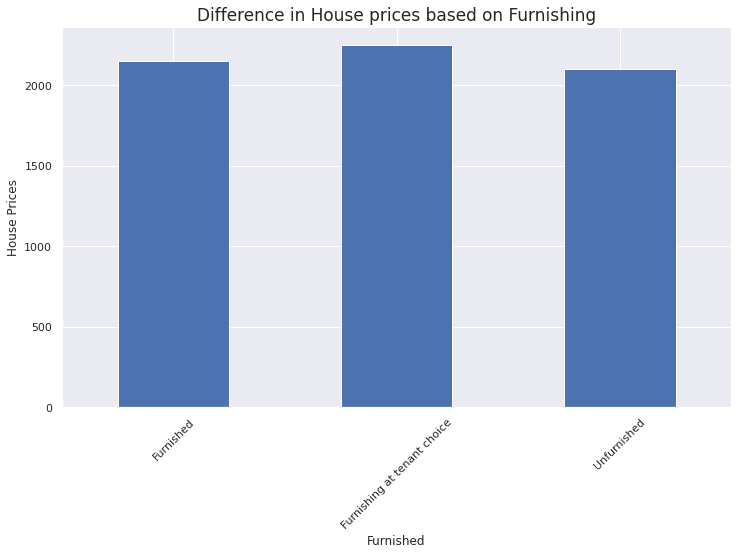

In [14]:
# Compare the prices of Furnished and Unfurnished Houses

df[["Price", "Furnished"]].groupby("Furnished").mean().plot(kind="bar", 
                                                            rot=45,
                                                           figsize=(12, 7),
                                                           legend=False)
plt.title("Difference in House prices based on Furnishing", 
         fontsize=17)
plt.ylabel("House Prices")
plt.show()

Both furnished and unfurnished houses had almost equal average price. The houses that were furnished due to tenants choice had a slightly higher prices

/home/ustadhi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


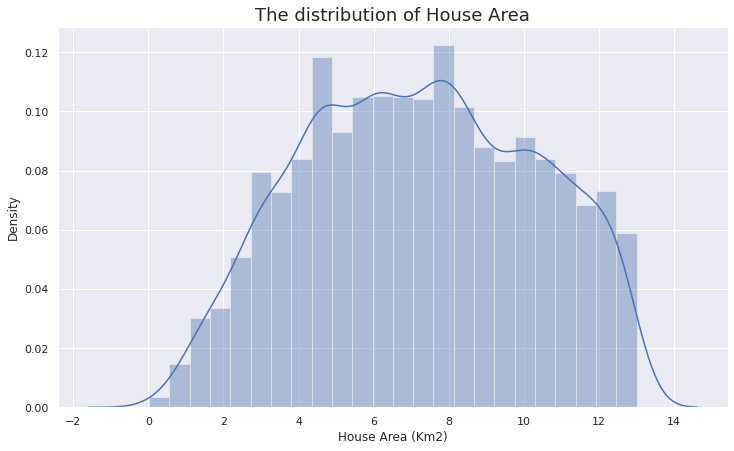

In [15]:
# The distrubution of House Area
plt.figure(figsize=(12, 7))
sns.distplot(df["Area"])
plt.title("The distribution of House Area", fontsize=18)
plt.xlabel("House Area (Km2)")
plt.show()

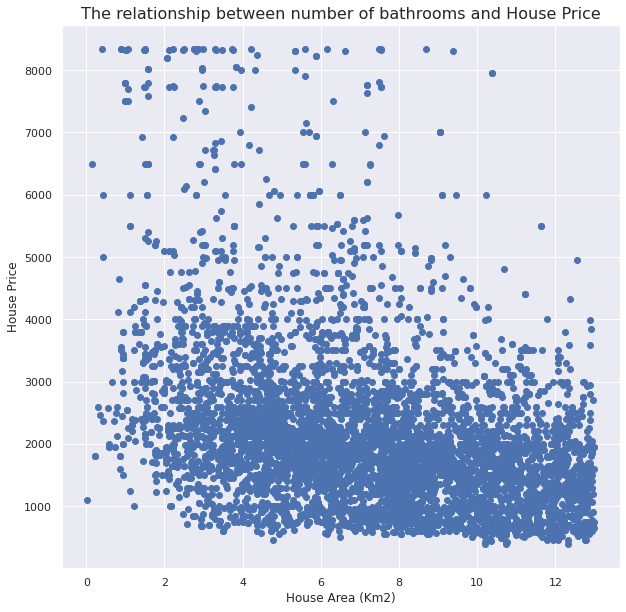

In [16]:
# The relationship between Bath and House Area
plt.figure(figsize=(10, 10))
plt.scatter(df["Area"], df["Price"])
plt.title("The relationship between number of bathrooms and House Price",
         fontsize=16)
plt.ylabel("House Price")
plt.xlabel("House Area (Km2)")
plt.show()

In [17]:
explanation

NameError: name 'explanation' is not defined

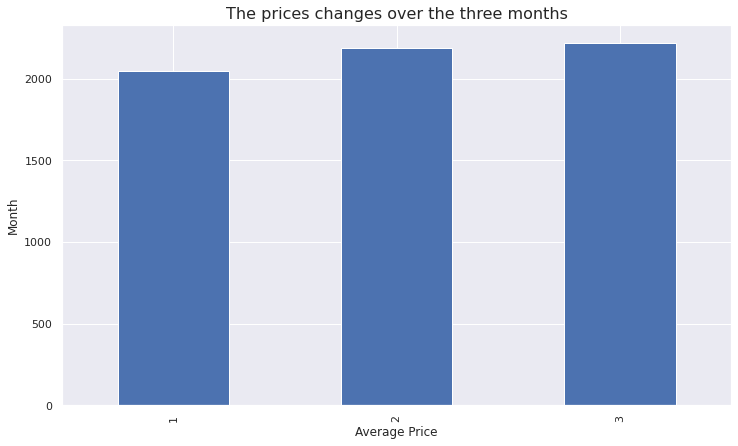

In [18]:
# Map the Month to int to ensure chart bars are arranged chronologically
mapper = {"May":1,
         "June":2,
         "July":3}

df["Month int"] = df["Month"].map(mapper)

# analyse price fluctuation based on the provided CSV files (May, June and July);
df[["Month int", "Price"]].groupby("Month int").mean().plot(kind="bar",
                                                           legend=False,
                                                           figsize=(12, 7))
plt.title("The prices changes over the three months", fontsize=16)
plt.xlabel("Average Price")
plt.ylabel('Month')
plt.show()


# drop the month int column
df.drop("Month int", axis=1, inplace=True)

In [19]:
# determine the correlation between the rental price and the other indices such as area, 
# nr. of bed, nr. of bath, furnished or unfurnished;

# convert furnished and unfurnished to integer
le=LabelEncoder()

df["Furnished"] = le.fit_transform(df["Furnished"])

# Calculate the correlation
df.corr()

,Price,Area,Bed,Bath,Furnished
Price,1.000000,-0.383584,0.417766,0.284290,-0.004666
Area,-0.383584,1.000000,0.069120,0.034282,0.186959
Bed,0.417766,0.069120,1.000000,0.428399,0.061214
Bath,0.284290,0.034282,0.428399,1.000000,-0.019810
Furnished,-0.004666,0.186959,0.061214,-0.019810,1.000000


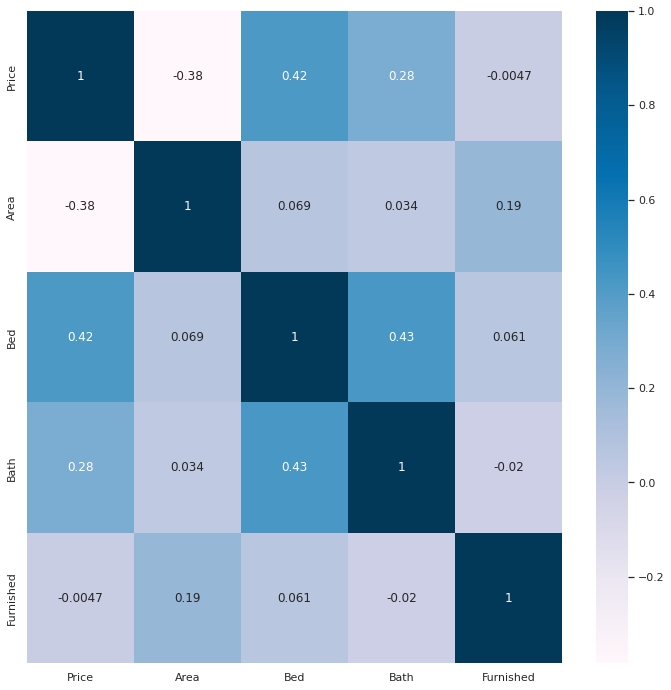

In [20]:
# Visualize the correlation
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap="PuBu", annot=True)
plt.show()

<AxesSubplot:xlabel='Month'>

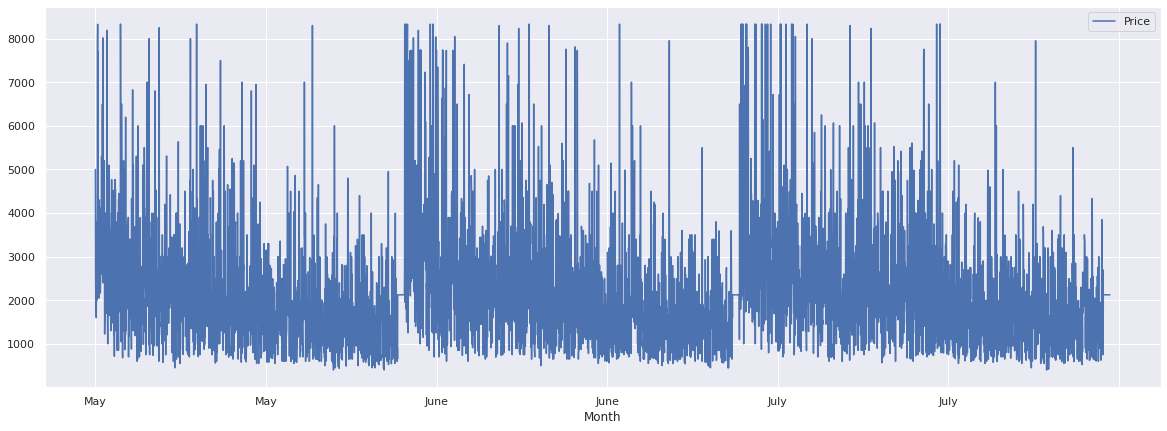

In [21]:
# -	analyse and visualise the price patterns during the three months;
price_patterns = df[["Price", "Month"]].set_index("Month")
price_patterns.plot(figsize=(20, 7))

# check out here 

In [22]:
# -	name other factors that may influence the private rental market in Greater London;

# Preprocessing

**Split the data into predictor and target**

In [23]:
X = df.drop(["Title", "Month", "Price"], axis=1)
y = df["Price"]

In [24]:
# Min Max Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaledX = scaler.fit_transform(X)

**Train Test Split**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.2)

# Data Modelling

## Linear Regression

In [26]:
# create an instance of the model
linReg = LinearRegression()

# fit the train data to the model
linReg.fit(X_train, y_train)

# Predictions
y_pred = linReg.predict(X_test)

# Evaluate the model
r2_score(y_test, y_pred)

0.3430055089501318

## Ridge Regression

In [27]:
# create an instance of the model
ridge = Ridge()

# fit the train data to the model
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
r2_score(y_test, y_pred)

0.34308950156056806

## Random Forest Regressor

In [28]:
# create an instance of the model
rfReg = RandomForestRegressor()

# fit the train data to the model
rfReg.fit(X_train, y_train)

# Predictions
y_pred = rfReg.predict(X_test)

# Evaluate the model
r2_score(y_test, y_pred)

0.5366172359232919

## Support Vector Machine Regression

In [29]:
# create an instance of the model
svr = SVR()

# fit the train data to the model
svr.fit(X_train, y_train)

# Predictions
y_pred = svr.predict(X_test)

# Evaluate the model
r2_score(y_test, y_pred)

0.07816058648439206

## Ada Boost Regressor

In [30]:
# create an instance of the model
adaReg = AdaBoostRegressor()

# fit the train data to the model
adaReg.fit(X_train, y_train)

# Predictions
y_pred = adaReg.predict(X_test)

# Evaluate the model
r2_score(y_test, y_pred)

0.12472696917015047